# Binary Class Logistic Regression

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. In binary class logistic regression, the outcome is binary, meaning it can take only two possible values, such as pass or fail, yes or no, etc.

In this notebook, we'll use logistic regression to predict whether a student passes or fails based on their study hours. We'll start by importing the necessary libraries and loading the dataset.

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

### Synthetic Data Generation

Let's generate synthetic data for our example. We'll create two numpy arrays: one representing the study hours and the other representing whether the student passes or fails (0 for fail, 1 for pass).

In [6]:
# Generating synthetic data
study_hours = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])
pass_fail = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1])  # 0 indicates fail, 1 indicates pass

# Reshaping study_hours for sklearn compatibility
X = study_hours.reshape(-1, 1)

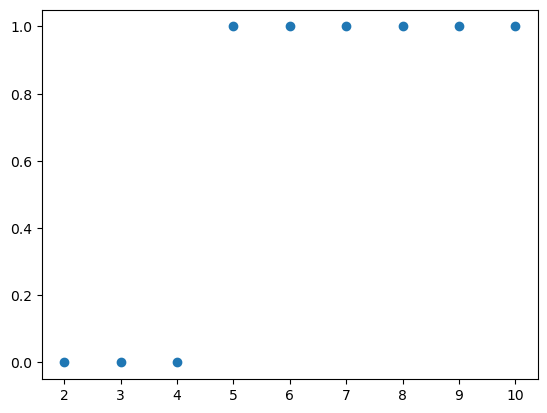

In [8]:
plt.scatter(study_hours,pass_fail)

### Model Training

Now, let's create and train the logistic regression model using scikit-learn's LogisticRegression class. We'll fit the model to our synthetic data.

In [10]:
# Creating and fitting the logistic regression model
model = LogisticRegression()
model.fit(X, pass_fail)

LogisticRegression()

### Decision Boundary

In logistic regression, the decision boundary is the line that separates the two classes. Let's get the slope (coefficient) and intercept of the decision boundary learned by our model.

In [12]:
# Getting the slope (coefficient) and intercept of the decision boundary
slope = model.coef_[0][0]
intercept = model.intercept_[0]
slope,intercept

(1.1593919927638905, -5.188478389659907)

### Plotting

Finally, let's visualize our data and the decision boundary learned by the logistic regression model.

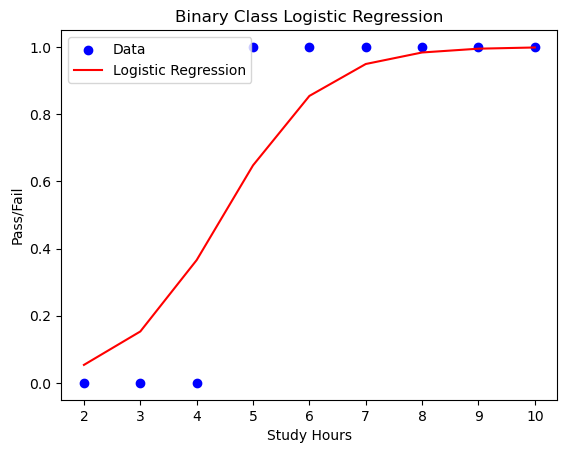

In [16]:
# Plotting the data and decision boundary
plt.scatter(study_hours, pass_fail, color='blue', label='Data')
plt.plot(study_hours, model.predict_proba(X)[:,1], color='red', label='Logistic Regression')
plt.xlabel('Study Hours')
plt.ylabel('Pass/Fail')
plt.title('Binary Class Logistic Regression')
plt.legend()

plt.show()

In [20]:
import math

def sigmoid(m,c,x):
    return 1 / (1 + math.pow(math.e,-(m*x+c)))




In [22]:
sigmoid(1.1593919927638905, -5.188478389659907,4)

0.36565321072048057

### Interpretation of Coefficients

| Coefficient | Interpretation                          |
|-------------|-----------------------------------------|
| Intercept   | Determines the point where the decision boundary crosses the y-axis. If the value is positive, it shifts the decision boundary upwards; if negative, it shifts it downwards. |
| Slope       | Determines the slope of the decision boundary. It indicates how much the probability of passing changes with one unit increase in study hours. |

In our example, the intercept value determines the point where the decision boundary crosses the y-axis, and the slope value determines the slope of the decision boundary. As the study hours increase, the probability of passing also increases, as indicated by the positive slope value.

### Calculating Predicted Probabilities

Let's calculate the predicted probabilities for each study hour based on the logistic regression model we trained.

In [26]:
# Calculating predicted probabilities
predicted_probabilities = model.predict_proba(X)[:,1]

# Creating a DataFrame to display the results
results_df = pd.DataFrame({'Study Hours': study_hours, 'Predicted Probability': predicted_probabilities})

# Displaying the results
results_df

,Study Hours,Predicted Probability
0,2,0.053672
1,3,0.153124
2,4,0.365653
3,5,0.647594
4,6,0.854193
5,7,0.949178
6,8,0.983482
7,9,0.994759
8,10,0.998350


In [32]:
model.predict_proba(X)[:,1]

array([0.05367217, 0.1531245 , 0.36565321, 0.64759435, 0.85419303,
       0.94917793, 0.98348214, 0.99475932, 0.99835019])